In [ ]:
from pymongo import MongoClient
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client = MongoClient("mongodb://localhost:27017/accidents")

In [3]:
accidents_df = pd.DataFrame(list(client['accidents']['accidents'].find({})))

In [88]:
accidents_df

_id        region_name            mun_name  \
0        66696dad7e5dfcbad22cebfc  Ямало-Ненецкий АО  Шурышкарский район   
1        66696dad7e5dfcbad22cebfd  Ямало-Ненецкий АО  Шурышкарский район   
2        66696dad7e5dfcbad22cebfe  Ямало-Ненецкий АО  Шурышкарский район   
3        66696dad7e5dfcbad22cebff  Ямало-Ненецкий АО  Шурышкарский район   
4        66696dad7e5dfcbad22cec00  Ямало-Ненецкий АО  Шурышкарский район   
...                           ...                ...                 ...   
1439334  66696ddd7e5dfcbad242e262             Сириус              Сириус   
1439335  66696ddd7e5dfcbad242e263             Сириус              Сириус   
1439336  66696ddd7e5dfcbad242e264             Сириус              Сириус   
1439337  66696ddd7e5dfcbad242e265             Сириус              Сириус   
1439338  66696ddd7e5dfcbad242e266             Сириус              Сириус   

                   datetime                  type  dead_number  \
0       2015-12-12 19:55:00     Наезд на пешехода            0   
1       2015-10-11 18:05:00     Наезд на пешехода            0   
2       2015-10-05 14:15:00     Наезд на пешехода            0   
3       2015-04-18 16:30:00  Наезд на препятствие            1   
4       2015-03-08 00:40:00          Столкновение            1   
...                     ...                   ...          ...   
1439334 2024-03-30 15:05:00  Наезд на препятствие            1   
1439335 2024-03-16 13:55:00          Столкновение            0   
1439336 2024-03-06 15:40:00          Столкновение            0   
1439337 2024-02-26 18:50:00          Столкновение            0   
1439338 2024-02-16 20:30:00     Наезд на пешехода            0   

         injured_number  car_number  member_number road_network_disadvantages  \
0                     1           1              2           [Не установлены]   
1                     1           1              2           [Не установлены]   
2                     1           1              2           [Не установлены]   
3                     0           1              2           [Не установлены]   
4                     1           2              4           [Не установлены]   
...                 ...         ...            ...                        ...   
1439334               0           1              1           [Не установлены]   
1439335               1           2              2           [Не установлены]   
1439336               1           2              2           [Не установлены]   
1439337               1           2              2           [Не установлены]   
1439338               1           2              2           [Не установлены]   

           driving_mode_factors     weather   roadway_condition  \
0        [Сведения отсутствуют]      [Ясно]  Со снежным накатом   
1        [Сведения отсутствуют]      [Ясно]         Заснеженное   
2        [Сведения отсутствуют]      [Ясно]               Сухое   
3        [Сведения отсутствуют]  [Пасмурно]  Со снежным накатом   
4        [Сведения отсутствуют]      [Ясно]  Со снежным накатом   
...                         ...         ...                 ...   
1439334  [Сведения отсутствуют]      [Ясно]               Сухое   
1439335  [Сведения отсутствуют]      [Ясно]               Сухое   
1439336  [Сведения отсутствуют]  [Пасмурно]               Сухое   
1439337  [Сведения отсутствуют]      [Ясно]               Сухое   
1439338  [Сведения отсутствуют]      [Ясно]               Сухое   

                                            lighting  longitude   latitude  \
0           В темное время суток, освещение включено  64.699444  65.408056   
1        В темное время суток, освещение отсутствует  64.984444  65.675556   
2                                Светлое время суток  64.713333  65.427500   
3                                Светлое время суток    65.0621    64.5606   
4        В темное время суток, освещение отсутствует  64.580278  65.610278   
...                                              ...        ...        ...   


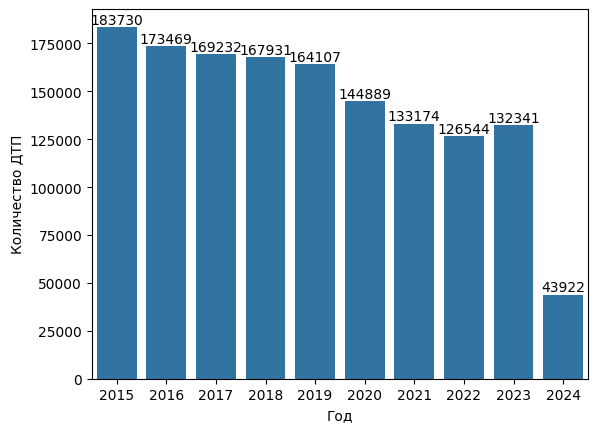

In [77]:
agg_by_year = accidents_df.groupby(accidents_df.datetime.dt.year)['_id'].count().reset_index().rename({"datetime": "Год", "_id": "Количество ДТП"}, axis=1)
ax = sns.barplot(agg_by_year, x="Год", y="Количество ДТП")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

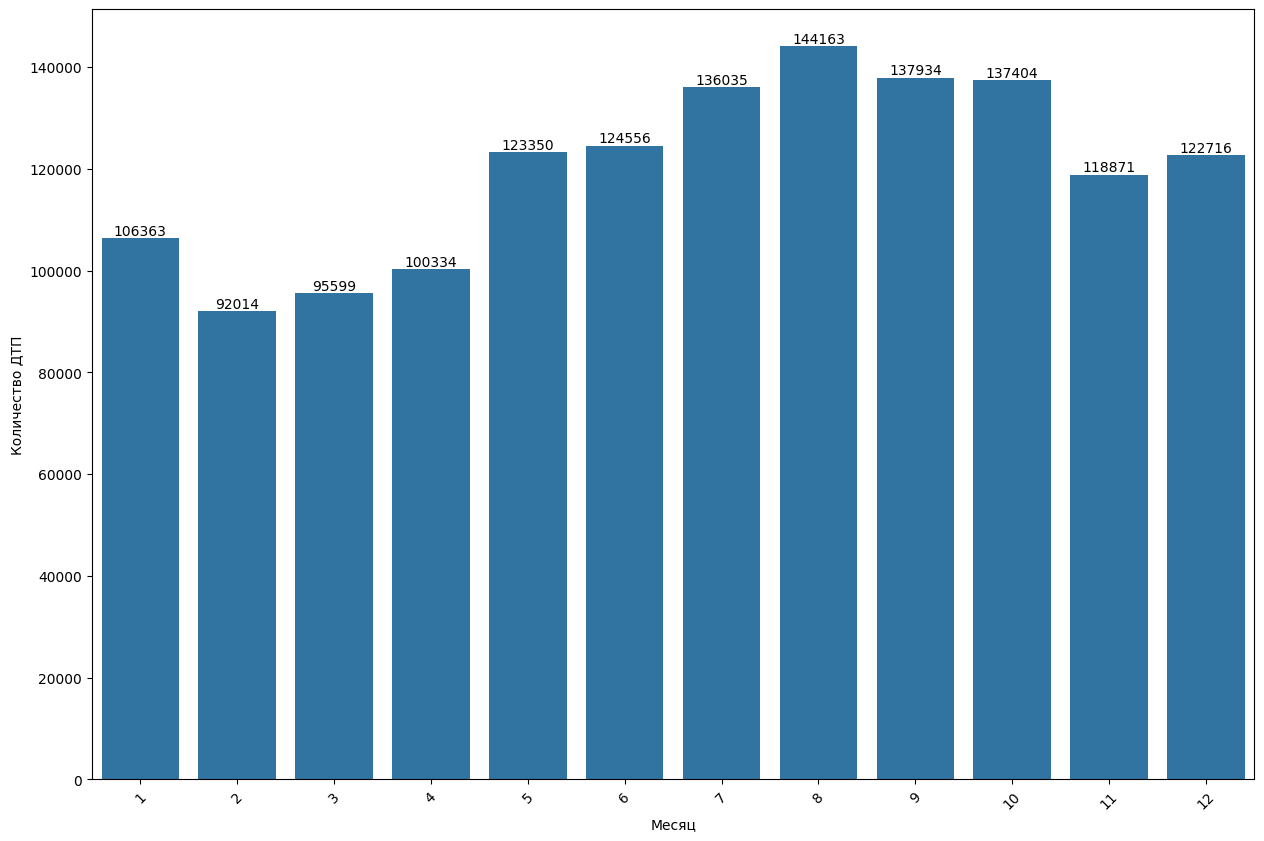

In [81]:
agg_by_month = accidents_df.groupby(accidents_df.datetime.dt.month)['_id'].count().reset_index().rename({"datetime": "Месяц", "_id": "Количество ДТП"}, axis=1)
plt.figure(figsize=(15, 10))
ax = sns.barplot(agg_by_month, x="Месяц", y="Количество ДТП")
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=45)
plt.show()

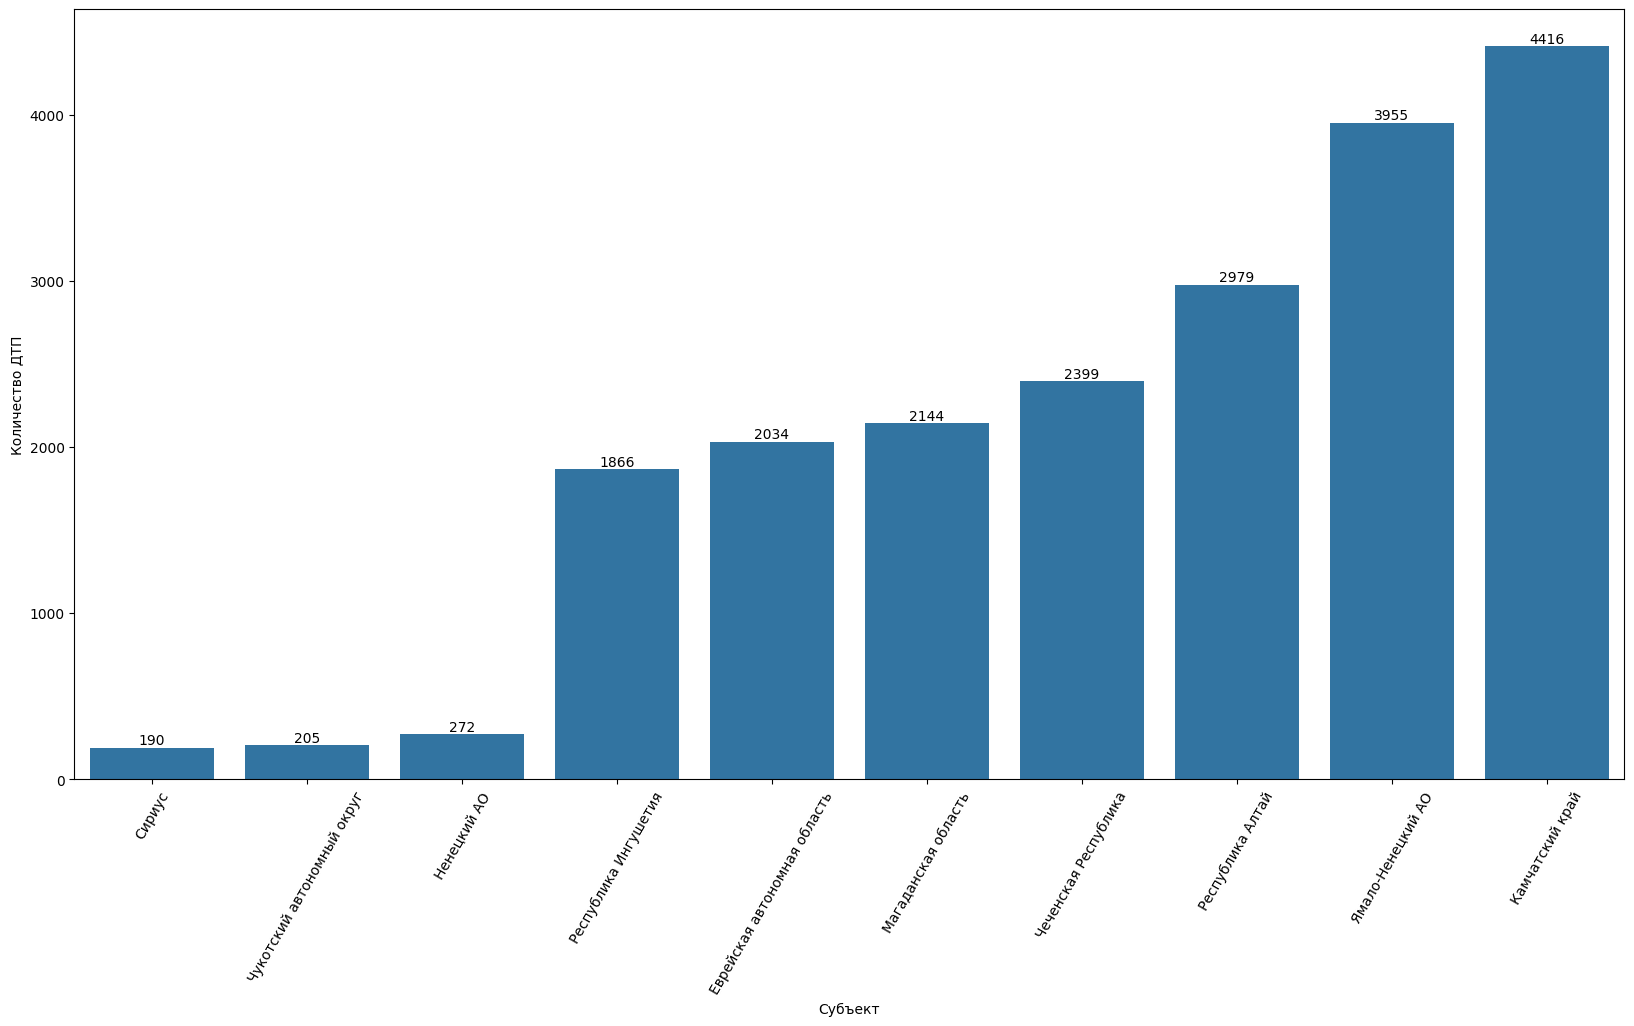

In [87]:
# agg_by_year = accidents_df.groupby(accidents_df.region_name)['_id'].count().reset_index().rename({"region_name": "Субъект", "_id": "Количество ДТП"}, axis=1).sort_values("Количество ДТП").tail(10)
agg_by_year = accidents_df.groupby(accidents_df.region_name)['_id'].count().reset_index().rename({"region_name": "Субъект", "_id": "Количество ДТП"}, axis=1).sort_values("Количество ДТП").head(10)
plt.figure(figsize=(20, 10))
ax = sns.barplot(agg_by_year, x="Субъект", y="Количество ДТП")
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=60)
plt.show()
ax.figure.savefig("out.png")

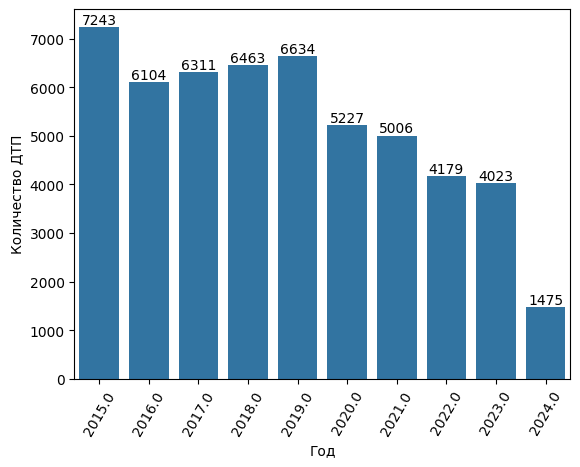

In [91]:
spb_accidents = accidents_df.loc[accidents_df.region_name == "г. Санкт-Петербург"]
agg_by_year = accidents_df.groupby(spb_accidents.datetime.dt.year.astype("int"))['_id'].count().reset_index().rename({"datetime": "Год", "_id": "Количество ДТП"}, axis=1)
ax = sns.barplot(agg_by_year, x="Год", y="Количество ДТП")
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=60)
plt.show()

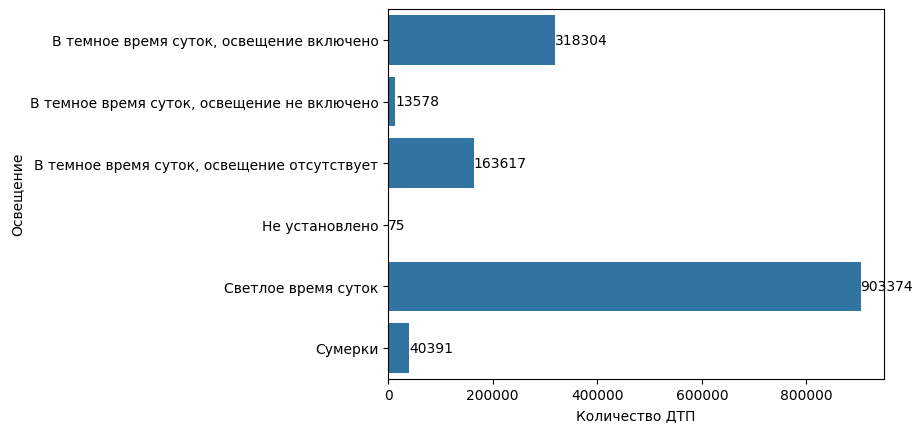

In [98]:
# spb_accidents = accidents_df.loc[accidents_df.region_name == "г. Санкт-Петербург"]
agg_by_year = accidents_df.groupby(accidents_df.lighting)['_id'].count().reset_index().rename({"lighting": "Освещение", "_id": "Количество ДТП"}, axis=1)
ax = sns.barplot(agg_by_year, y="Освещение", x="Количество ДТП")
ax.bar_label(ax.containers[0], fontsize=10)
# plt.xticks(rotation=90)
plt.show()

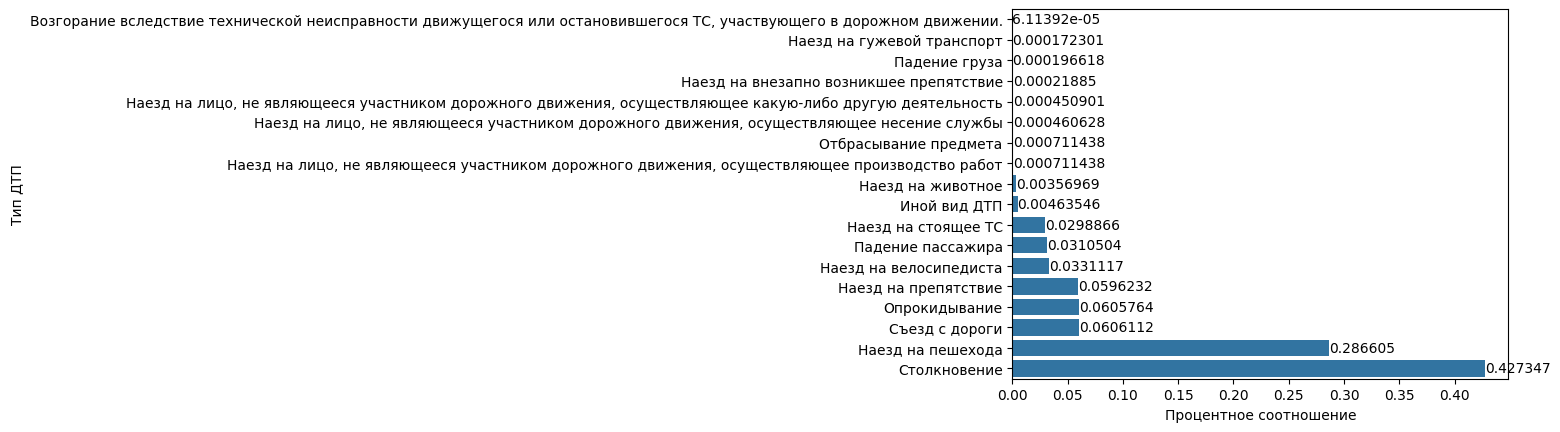

In [9]:
# spb_accidents = accidents_df.loc[accidents_df.region_name == "г. Санкт-Петербург"]
agg_by_year = accidents_df['type'].value_counts(normalize=True).reset_index().rename({"type": "Тип ДТП", "proportion": "Процентное соотношение"}, axis=1).sort_values("Процентное соотношение")
ax = sns.barplot(agg_by_year, y="Тип ДТП", x="Процентное соотношение")
ax.bar_label(ax.containers[0], fontsize=10)
# plt.xticks(rotation=90)
plt.show()

In [6]:
accidents_df['type'].value_counts(normalize=True).reset_index()

type  proportion
0                                        Столкновение    0.427347
1                                   Наезд на пешехода    0.286605
2                                      Съезд с дороги    0.060611
3                                       Опрокидывание    0.060576
4                                Наезд на препятствие    0.059623
5                              Наезд на велосипедиста    0.033112
6                                   Падение пассажира    0.031050
7                                 Наезд на стоящее ТС    0.029887
8                                        Иной вид ДТП    0.004635
9                                   Наезд на животное    0.003570
10  Наезд на лицо, не являющееся участником дорожн...    0.000711
11                              Отбрасывание предмета    0.000711
12  Наезд на лицо, не являющееся участником дорожн...    0.000461
13  Наезд на лицо, не являющееся участником дорожн...    0.000451
14            Наезд на внезапно возникшее препятствие    0.000219
15                                      Падение груза    0.000197
16                         Наезд на гужевой транспорт    0.000172
17  Возгорание вследствие технической неисправност...    0.000061